<a href="https://colab.research.google.com/github/aldiansyahali/Data/blob/main/ADS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
import sklearn # Langkah 1: Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

In [ ]:
from IPython.display import display

# Memuat dataset dari URL
url = "https://raw.githubusercontent.com/arubhasy/dataset/main/Telco-Customer-Churn.csv"
data = pd.read_csv(url)

data


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,F,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
#Volume Dataset
print(df.shape)

(7032, 33)


In [ ]:
# Melihat distribusi missing values
print(data.isnull().sum())

customerID          0
gender              5
SeniorCitizen       0
Partner             0
Dependents          0
tenure              3
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
# **Mengubah nilai gender 'F' ke 'Female' dan 'M' ke 'Male'**
data['gender'] = data['gender'].replace({'F': 'Female', 'M': 'Male'})

# drop baris yang missing value
data = data.dropna()

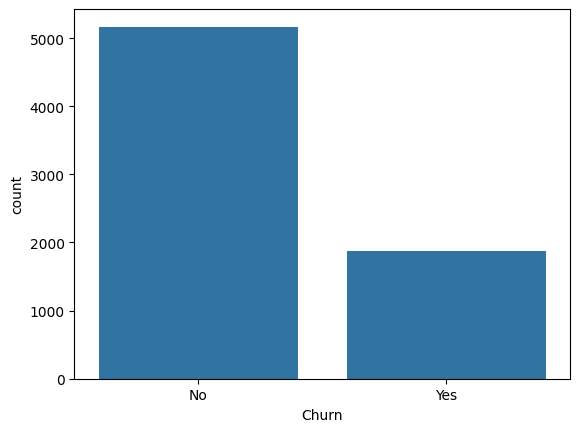

In [ ]:
# Melihat distribusi churn
sns.countplot(data=data, x='Churn')
plt.show()

In [ ]:
# Statistik deskriptif untuk kolom numerik
print(data.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7036.000000  7036.000000     7036.000000
mean        0.162166    35.052729       64.747044
std         0.368629   115.314480       30.081783
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000  7100.000000      118.750000


In [ ]:
# Langkah 4: Preprocessing Data
# Mengisi missing values pada TotalCharges
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

<ipython-input-160-35a20e797728>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
<ipython-input-160-35a20e797728>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


In [ ]:
# Encoding variabel kategorikal
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                       'PaperlessBilling', 'PaymentMethod']

# One-hot encoding
data = pd.get_dummies(data, columns=categorical_columns)

# Encoding Churn ke numerik
label_encoder = LabelEncoder()
data['Churn'] = label_encoder.fit_transform(data['Churn'])

In [ ]:
# Scaling fitur numerik
scaler = StandardScaler()
data[['MonthlyCharges', 'TotalCharges', 'tenure']] = scaler.fit_transform(data[['MonthlyCharges', 'TotalCharges', 'tenure']])

In [ ]:
# Langkah 5: Membagi data menjadi train dan test set
X = data.drop(['Churn', 'customerID'], axis=1)
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.dtypes)

SeniorCitizen                                int64
tenure                                     float64
MonthlyCharges                             float64
TotalCharges                               float64
gender_Female                                 bool
gender_Male                                   bool
Partner_No                                    bool
Partner_Yes                                   bool
Dependents_No                                 bool
Dependents_Yes                                bool
PhoneService_No                               bool
PhoneService_Yes                              bool
MultipleLines_No                              bool
MultipleLines_No phone service                bool
MultipleLines_Yes                             bool
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No                            bool
OnlineSecurity_No                             bool
OnlineSecurity_No internet serv

In [ ]:
# Langkah 6: Training model
from sklearn.tree import DecisionTreeClassifier # Import the correct class
model = DecisionTreeClassifier(random_state=42) # Fix the typo in the class name
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Langkah 7: Evaluasi model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82      1060
           1       0.46      0.52      0.49       348

    accuracy                           0.73      1408
   macro avg       0.65      0.66      0.65      1408
weighted avg       0.74      0.73      0.73      1408

Accuracy: 0.7286931818181818
ROC-AUC Score: 0.6585976469312513


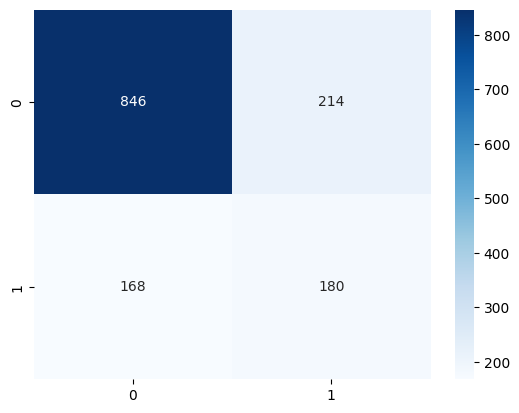

In [ ]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.show()

In [ ]:
# Import model tambahan
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(random_state=42)
# Training model Random Forest
rf_model.fit(X_train, y_train)

# Inisialisasi model Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
# Training model Logistic Regression
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

Random Forest Model Evaluation
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1060
           1       0.60      0.48      0.54       348

    accuracy                           0.79      1408
   macro avg       0.72      0.69      0.70      1408
weighted avg       0.78      0.79      0.79      1408

Accuracy: 0.7933238636363636
ROC-AUC Score: 0.8224612340056385


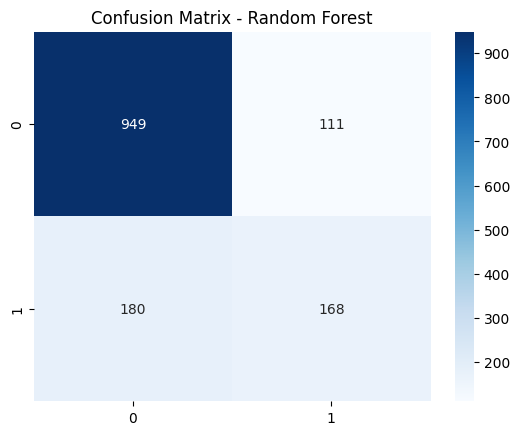

In [ ]:
# Prediksi menggunakan model Random Forest
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluasi model Random Forest
print("Random Forest Model Evaluation")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_rf))

# Confusion Matrix untuk Random Forest
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()

Logistic Regression Model Evaluation
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1060
           1       0.63      0.57      0.60       348

    accuracy                           0.81      1408
   macro avg       0.75      0.73      0.74      1408
weighted avg       0.81      0.81      0.81      1408

Accuracy: 0.8110795454545454
ROC-AUC Score: 0.8419336911732812


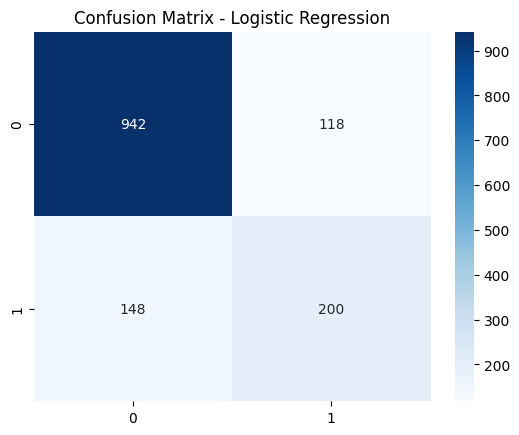

In [ ]:
# Prediksi menggunakan model Logistic Regression
y_pred_lr = lr_model.predict(X_test)
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]

# Evaluasi model Logistic Regression
print("Logistic Regression Model Evaluation")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_lr))

# Confusion Matrix untuk Logistic Regression
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

K-Nearest Neighbors Model Evaluation
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1060
           1       0.54      0.54      0.54       348

    accuracy                           0.77      1408
   macro avg       0.70      0.70      0.70      1408
weighted avg       0.77      0.77      0.77      1408

Accuracy: 0.7734375
ROC-AUC Score: 0.7792385057471264


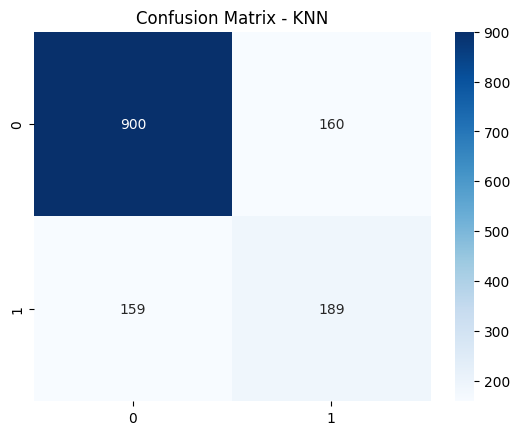

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Inisialisasi model KNN
knn_model = KNeighborsClassifier(n_neighbors=5)

# Melatih model KNN
knn_model.fit(X_train, y_train)

# Prediksi menggunakan model KNN
y_pred_knn = knn_model.predict(X_test)
y_prob_knn = knn_model.predict_proba(X_test)[:, 1]

# Evaluasi model KNN
print("K-Nearest Neighbors Model Evaluation")
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_knn))

# Confusion Matrix untuk KNN
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - KNN")
plt.show()

Support Vector Machine Model Evaluation
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1060
           1       0.68      0.54      0.60       348

    accuracy                           0.82      1408
   macro avg       0.77      0.73      0.74      1408
weighted avg       0.81      0.82      0.82      1408

Accuracy: 0.8231534090909091
ROC-AUC Score: 0.8146619496855347


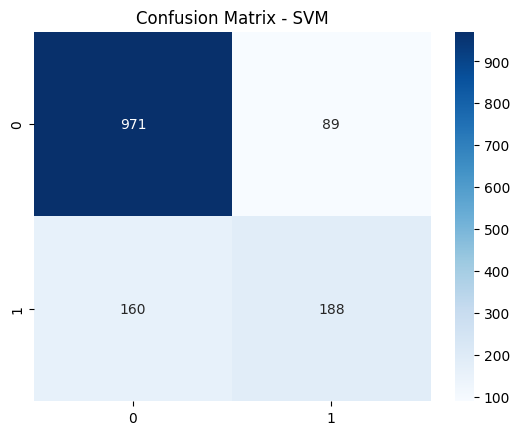

In [ ]:
from sklearn.svm import SVC

# Inisialisasi model SVM
svm_model = SVC(probability=True, random_state=42)

# Melatih model SVM
svm_model.fit(X_train, y_train)

# Prediksi menggunakan model SVM
y_pred_svm = svm_model.predict(X_test)
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]

# Evaluasi model SVM
print("Support Vector Machine Model Evaluation")
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_svm))

# Confusion Matrix untuk SVM
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.show()

In [ ]:
# mappings = {
#     'gender': {'Female': 1, 'Male': 0},
#     'Partner': {'Yes': 1, 'No': 0},
#     'Dependents': {'Yes': 1, 'No': 0},
#     'PhoneService': {'Yes': 1, 'No': 0},
#     'MultipleLines': {'Yes': 1, 'No': 0, 'No phone service': 2},
#     'Contract': {'One year': 1, 'Month-to-month': 0, 'Two year': 2},
#     'InternetService': {'DSL': 1, 'No': 0, 'Fiber optic': 2},
#     'PaymentMethod': {'Mailed check': 1, 'Electronic check': 0, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3},
#     'PaperlessBilling': {'Yes': 1, 'No': 0},
#     'OnlineSecurity': {'Yes': 1, 'No': 0, 'No internet service': 2},
#     'OnlineBackup': {'Yes': 1, 'No': 0, 'No internet service': 2},
#     'DeviceProtection': {'Yes': 1, 'No': 0, 'No internet service': 2},
#     'TechSupport': {'Yes': 1, 'No': 0, 'No internet service': 2},
#     'StreamingTV': {'Yes': 1, 'No': 0, 'No internet service': 2},
#     'StreamingMovies': {'Yes': 1, 'No': 0, 'No internet service': 2}
# }

# data.replace(mappings, inplace=True)

# data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,F,0,1,0,1.0,0,2,1,0,...,0,0,0,0,0,1,0,29.85,29.85,No
1,5575-GNVDE,0,0,0,0,34.0,1,0,1,1,...,1,0,0,0,1,0,1,56.95,1889.5,No
2,3668-QPYBK,0,0,0,0,2.0,1,0,1,1,...,0,0,0,0,0,1,1,53.85,108.15,Yes
3,7795-CFOCW,0,0,0,0,45.0,0,2,1,1,...,1,1,0,0,1,0,2,42.30,1840.75,No
4,9237-HQITU,1,0,0,0,2.0,1,0,2,0,...,0,0,0,0,0,1,0,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,0,1,1,24.0,1,1,1,1,...,1,1,1,1,1,1,1,84.80,1990.5,No
7039,2234-XADUH,1,0,1,1,72.0,1,1,2,0,...,1,0,1,1,1,1,3,103.20,7362.9,No
7040,4801-JZAZL,1,0,1,1,11.0,0,2,1,1,...,0,0,0,0,0,1,0,29.60,346.45,No
7041,8361-LTMKD,0,1,1,0,4.0,1,1,2,0,...,0,0,0,0,0,1,1,74.40,306.6,Yes


In [ ]:
# data['TotalCharges'].value_counts()



,count
TotalCharges,
,11
20.2,11
19.75,9
20.05,8
19.9,8
...,...
6849.4,1
692.35,1
130.15,1


In [ ]:
# data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7038 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7040 non-null   float64
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


In [ ]:
# data['TotalCharges']=data['TotalCharges'].replace({' ':2279},regex=True)
# data.describe()


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
count,7043.000000,7043.000000,7043.000000,7040.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,0.483033,0.299588,35.043892,0.903166,0.615505,1.222916,0.720006,0.778220,0.777226,0.723555,0.817691,0.821241,0.690473,0.592219,1.315633,64.761692
std,0.368612,0.499748,0.458110,115.282871,0.295752,0.656039,0.778877,0.796885,0.778472,0.778826,0.795896,0.763212,0.761725,0.833755,0.491457,1.148907,30.090047
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,70.350000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.850000
max,1.000000,1.000000,1.000000,7100.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000


In [ ]:
# data['TotalCharges']=data['TotalCharges'].astype(float)
# data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,F,0,1,0,1.0,0,2,1,0,...,0,0,0,0,0,1,0,29.85,29.85,No
1,5575-GNVDE,0,0,0,0,34.0,1,0,1,1,...,1,0,0,0,1,0,1,56.95,1889.50,No
2,3668-QPYBK,0,0,0,0,2.0,1,0,1,1,...,0,0,0,0,0,1,1,53.85,108.15,Yes
3,7795-CFOCW,0,0,0,0,45.0,0,2,1,1,...,1,1,0,0,1,0,2,42.30,1840.75,No
4,9237-HQITU,1,0,0,0,2.0,1,0,2,0,...,0,0,0,0,0,1,0,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,0,1,1,24.0,1,1,1,1,...,1,1,1,1,1,1,1,84.80,1990.50,No
7039,2234-XADUH,1,0,1,1,72.0,1,1,2,0,...,1,0,1,1,1,1,3,103.20,7362.90,No
7040,4801-JZAZL,1,0,1,1,11.0,0,2,1,1,...,0,0,0,0,0,1,0,29.60,346.45,No
7041,8361-LTMKD,0,1,1,0,4.0,1,1,2,0,...,0,0,0,0,0,1,1,74.40,306.60,Yes


In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# sc=MinMaxScaler()
# data['Encoded_MonthlyCharges']=sc.fit_transform(data[['MonthlyCharges']])
# data['Encoded_TotalCharges']=sc.fit_transform(data[['TotalCharges']])
# data['Encoded_tenure']=sc.fit_transform(data[['tenure']])
# data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Encoded_MonthlyCharges,Encoded_TotalCharges,Encoded_tenure
0,7590-VHVEG,F,0,1,0,1.0,0,2,1,0,...,0,0,1,0,29.85,29.85,No,0.115423,0.001275,0.000141
1,5575-GNVDE,0,0,0,0,34.0,1,0,1,1,...,0,1,0,1,56.95,1889.50,No,0.385075,0.215867,0.004789
2,3668-QPYBK,0,0,0,0,2.0,1,0,1,1,...,0,0,1,1,53.85,108.15,Yes,0.354229,0.010310,0.000282
3,7795-CFOCW,0,0,0,0,45.0,0,2,1,1,...,0,1,0,2,42.30,1840.75,No,0.239303,0.210241,0.006338
4,9237-HQITU,1,0,0,0,2.0,1,0,2,0,...,0,0,1,0,70.70,151.65,Yes,0.521891,0.015330,0.000282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,0,1,1,24.0,1,1,1,1,...,1,1,1,1,84.80,1990.50,No,0.662189,0.227521,0.003380
7039,2234-XADUH,1,0,1,1,72.0,1,1,2,0,...,1,1,1,3,103.20,7362.90,No,0.845274,0.847461,0.010141
7040,4801-JZAZL,1,0,1,1,11.0,0,2,1,1,...,0,0,1,0,29.60,346.45,No,0.112935,0.037809,0.001549
7041,8361-LTMKD,0,1,1,0,4.0,1,1,2,0,...,0,0,1,1,74.40,306.60,Yes,0.558706,0.033210,0.000563


In [ ]:
# x=data.drop(columns=["Churn","customerID"],axis=1)
# x


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Encoded_MonthlyCharges,Encoded_TotalCharges,Encoded_tenure
0,F,0,1,0,1.0,0,2,1,0,1,...,0,0,0,1,0,29.85,29.85,0.115423,0.001275,0.000141
1,0,0,0,0,34.0,1,0,1,1,0,...,0,0,1,0,1,56.95,1889.50,0.385075,0.215867,0.004789
2,0,0,0,0,2.0,1,0,1,1,1,...,0,0,0,1,1,53.85,108.15,0.354229,0.010310,0.000282
3,0,0,0,0,45.0,0,2,1,1,0,...,0,0,1,0,2,42.30,1840.75,0.239303,0.210241,0.006338
4,1,0,0,0,2.0,1,0,2,0,0,...,0,0,0,1,0,70.70,151.65,0.521891,0.015330,0.000282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24.0,1,1,1,1,0,...,1,1,1,1,1,84.80,1990.50,0.662189,0.227521,0.003380
7039,1,0,1,1,72.0,1,1,2,0,1,...,1,1,1,1,3,103.20,7362.90,0.845274,0.847461,0.010141
7040,1,0,1,1,11.0,0,2,1,1,0,...,0,0,0,1,0,29.60,346.45,0.112935,0.037809,0.001549
7041,0,1,1,0,4.0,1,1,2,0,0,...,0,0,0,1,1,74.40,306.60,0.558706,0.033210,0.000563


In [ ]:
# y=data["Churn"]
# y

,Churn
0,No
1,No
2,Yes
3,No
4,Yes
...,...
7038,No
7039,No
7040,No
7041,Yes


In [ ]:
# from sklearn.model_selection import train_test_split
# x_train, x_test ,y_train,y_test=train_test_split (x,y,train_size=0.8,random_state=1)
# x_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Encoded_MonthlyCharges,Encoded_TotalCharges,Encoded_tenure
1814,0,0,1,1,12.0,1,0,0,2,2,...,2,2,2,0,1,19.70,258.35,0.014428,0.027643,0.001690
5946,1,0,0,0,42.0,1,0,1,1,1,...,0,1,1,0,3,73.90,3160.55,0.553731,0.362538,0.005915
3881,0,0,1,0,71.0,1,1,1,1,1,...,0,0,2,0,2,65.15,4681.75,0.466667,0.538074,0.010000
2389,0,0,1,1,71.0,1,1,1,1,0,...,1,1,1,0,0,85.45,6300.85,0.668657,0.724908,0.010000
3676,0,0,0,0,30.0,1,0,1,1,1,...,1,0,1,0,0,70.40,2044.75,0.518905,0.233781,0.004225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,0,1,0,0,9.0,1,1,2,0,0,...,1,1,0,1,0,100.50,918.60,0.818408,0.103831,0.001268
5192,0,0,0,1,60.0,1,0,0,2,2,...,2,2,2,0,1,19.95,1189.90,0.016915,0.135137,0.008451
3980,0,0,0,0,28.0,1,1,2,0,1,...,1,1,0,1,0,105.70,2979.50,0.870149,0.341646,0.003944
235,0,0,0,0,2.0,1,1,1,0,1,...,0,0,0,1,1,54.40,114.10,0.359701,0.010997,0.000282


In [ ]:
# y_train

,Churn
1814,No
5946,Yes
3881,No
2389,No
3676,No
...,...
905,Yes
5192,No
3980,Yes
235,Yes


In [ ]:
# # Inisialisasi dan pelatihan model Random Forest
# rf_model = RandomForestClassifier(random_state=42)
# rf_model.fit(X_train, y_train)

# # Prediksi pada data testing
# y_pred_rf = rf_model.predict(X_test)

In [ ]:


# # Random Forest
# print("Random Forest Model Evaluation")
# print(confusion_matrix(y_test, y_pred_rf))
# print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
# print(f"Precision: {precision_score(y_test, y_pred_rf):.2f}")
# print(f"Recall: {recall_score(y_test, y_pred_rf):.2f}")
# print(f"F1-Score: {f1_score(y_test, y_pred_rf):.2f}\n")


Decision Tree Model Evaluation
[[824 209]
 [185 189]]
Accuracy: 0.72
Precision: 0.47
Recall: 0.51
F1-Score: 0.49

Random Forest Model Evaluation
[[927 106]
 [205 169]]
Accuracy: 0.78
Precision: 0.61
Recall: 0.45
F1-Score: 0.52

